# Berechnung der Durchschnittlichen Spiellänge mittels Markov-Ketten
### Import der benötigten Bibliotheken

## Berechnen der Werte

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm,SymLogNorm

import sympy as sy
from datetime import datetime


from matplotlib.colors import LinearSegmentedColormap

# %config InlineBackend.figure_formats = ['svg']
# mplstyle.use('fast')
# mplstyle.use('default')
# mpl.rcParams['figure.figsize'] = [20, 10]

colors = ["lightgreen", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)


### Definition der Wahrscheinlichkeiten der einzelnen Würfelwerte

In [73]:
VierfachMünzwurf = {
    "dice":1/16,
    "diceI":1/4,
    "diceII":3/8,
    "diceIII":1/4,
    "diceIV":1/16
}

VierfachMünzwurf_exakt = {
    "dice": sy.nsimplify(1/16, tolerance=0.001, rational=True),
    "diceI": sy.nsimplify(1/4, tolerance=0.001, rational=True),
    "diceII": sy.nsimplify(3/8, tolerance=0.001, rational=True),
    "diceIII": sy.nsimplify(1/4, tolerance=0.001, rational=True),
    "diceIV": sy.nsimplify(1/16, tolerance=0.001, rational=True)
}


### Definition der Übergangsmatrizen

In [74]:

def RundenMatrix(dice, diceI, diceII, diceIII, diceIV):
    return np.asarray(
        [[dice,  diceI,  diceII,  diceIII,  diceIV * dice,  diceIV * diceI,  diceIV * diceII,  diceIV * diceIII,  diceIV * diceIV * dice,  diceIV * diceIV * diceI,  diceIV * diceIV * diceII,  diceIV * diceIV * diceIII,  diceIV * diceIV * diceIV, 0, 0, 0],
         [0,  dice,  diceI,  diceII,  diceIII * dice,  diceIV + diceIII * diceI,  diceIII * diceII,  diceIII * diceIII,  diceIII * diceIV *
            dice,  diceIII * diceIV * diceI,  diceIII * diceIV * diceII,  diceIII * diceIV * diceIII,  diceIII * diceIV * diceIV, 0, 0, 0],
            [0, 0,  dice,  diceI,  diceII * dice,  diceIII + diceII * diceI,  diceIV + diceII * diceII,  diceII * diceIII,  diceII * diceIV *
                dice,  diceII * diceIV * diceI,  diceII * diceIV * diceII,  diceII * diceIV * diceIII,  diceII * diceIV * diceIV, 0, 0, 0],
            [0, 0, 0,  dice,  diceI * dice,  diceII + diceI * diceI,  diceIII + diceI * diceII,  diceIV + diceI * diceIII,  diceI *
                diceIV * dice,  diceI * diceIV * diceI,  diceI * diceIV * diceII,  diceI * diceIV * diceIII,  diceI * diceIV * diceIV, 0, 0, 0],
            [0, 0, 0, 0,  dice,  diceI,  diceII,  diceIII,  diceIV * dice,  diceIV *
                diceI,  diceIV * diceII,  diceIV * diceIII,  diceIV * diceIV, 0, 0, 0],
            [0, 0, 0, 0, 0,  dice,  diceI,  diceII,  diceIII * dice,  diceIV + diceIII *
                diceI,  diceIII * diceII,  diceIII * diceIII,  diceIII * diceIV, 0, 0, 0],
            [0, 0, 0, 0, 0, 0,  dice,  diceI,  diceII * dice,  diceIII + diceII * diceI,
                diceIV + diceII * diceII,  diceII * diceIII,  diceII * diceIV, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0,  dice,  diceI * dice,  diceII + diceI * diceI, diceIII +
                diceI * diceII,  diceIV + diceI * diceIII,  diceI * diceIV, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0,  dice,  diceI,
                diceII,  diceIII,  diceIV, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0,  dice,  diceI,
                diceII,  diceIII,  diceIV, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  dice,  diceI,  diceII,  diceIII,
                diceIV*(dice + diceII + diceIII + diceIV),  diceIV * diceI],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  dice,  diceI,  diceII,  diceIII *
                (dice + diceII + diceIII + diceIV),  diceIV + (diceIII * diceI)],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  dice + diceIV,  diceI,  diceII *
                (dice + diceII + diceIII + diceIV),  diceIII + (diceII * diceI)],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  dice + diceIII + diceIV,
                diceI*(dice + diceII + diceIII + diceIV),  diceII + (diceI * diceI)],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                dice + diceII + diceIII + diceIV,  diceI],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])


def SchritteMatrix(dice, diceI, diceII, diceIII, diceIV):
    return np.asarray([
        [dice, diceI,  diceII,  diceIII,  diceIV, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, dice, diceI,  diceII,  diceIII,  diceIV, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, dice, diceI,  diceII,  diceIII,  diceIV, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, dice,  diceI,  diceII, diceIII,  diceIV, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, dice,  diceI,  diceII, diceIII,  diceIV, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, dice,  diceI,  diceII, diceIII, diceIV],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, dice +
            diceIV,  diceI,  diceII,  diceIII],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            dice+diceIII + diceIV,  diceI,  diceII],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            dice+diceII + diceIII + diceIV,  diceI],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            dice + diceI + diceII + diceIII + diceIV],
    ])


def RundenMatrix_exakt(dice, diceI, diceII, diceIII, diceIV):
    return sy.Matrix(
        [[dice,  diceI,  diceII,  diceIII,  diceIV * dice,  diceIV * diceI,  diceIV * diceII,  diceIV * diceIII,  diceIV * diceIV * dice,  diceIV * diceIV * diceI,  diceIV * diceIV * diceII,  diceIV * diceIV * diceIII,  diceIV * diceIV * diceIV, 0, 0, 0],
         [0,  dice,  diceI,  diceII,  diceIII * dice,  diceIV + diceIII * diceI,  diceIII * diceII,  diceIII * diceIII,  diceIII * diceIV *
            dice,  diceIII * diceIV * diceI,  diceIII * diceIV * diceII,  diceIII * diceIV * diceIII,  diceIII * diceIV * diceIV, 0, 0, 0],
            [0, 0,  dice,  diceI,  diceII * dice,  diceIII + diceII * diceI,  diceIV + diceII * diceII,  diceII * diceIII,  diceII * diceIV *
                dice,  diceII * diceIV * diceI,  diceII * diceIV * diceII,  diceII * diceIV * diceIII,  diceII * diceIV * diceIV, 0, 0, 0],
            [0, 0, 0,  dice,  diceI * dice,  diceII + diceI * diceI,  diceIII + diceI * diceII,  diceIV + diceI * diceIII,  diceI *
                diceIV * dice,  diceI * diceIV * diceI,  diceI * diceIV * diceII,  diceI * diceIV * diceIII,  diceI * diceIV * diceIV, 0, 0, 0],
            [0, 0, 0, 0,  dice,  diceI,  diceII,  diceIII,  diceIV * dice,  diceIV *
                diceI,  diceIV * diceII,  diceIV * diceIII,  diceIV * diceIV, 0, 0, 0],
            [0, 0, 0, 0, 0,  dice,  diceI,  diceII,  diceIII * dice,  diceIV + diceIII *
                diceI,  diceIII * diceII,  diceIII * diceIII,  diceIII * diceIV, 0, 0, 0],
            [0, 0, 0, 0, 0, 0,  dice,  diceI,  diceII * dice,  diceIII + diceII * diceI,
                diceIV + diceII * diceII,  diceII * diceIII,  diceII * diceIV, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0,  dice,  diceI * dice,  diceII + diceI * diceI, diceIII +
                diceI * diceII,  diceIV + diceI * diceIII,  diceI * diceIV, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0,  dice,  diceI,
                diceII,  diceIII,  diceIV, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0,  dice,  diceI,
                diceII,  diceIII,  diceIV, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  dice,  diceI,  diceII,  diceIII,
                diceIV*(dice + diceII + diceIII + diceIV),  diceIV * diceI],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  dice,  diceI,  diceII,  diceIII *
                (dice + diceII + diceIII + diceIV),  diceIV + (diceIII * diceI)],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  dice + diceIV,  diceI,  diceII *
                (dice + diceII + diceIII + diceIV),  diceIII + (diceII * diceI)],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  dice + diceIII + diceIV,
                diceI*(dice + diceII + diceIII + diceIV),  diceII + (diceI * diceI)],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                dice + diceII + diceIII + diceIV,  diceI],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])


def SchritteMatrix_exakt(dice, diceI, diceII, diceIII, diceIV):
    return sy.Matrix([
        [dice, diceI,  diceII,  diceIII,  diceIV, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, dice, diceI,  diceII,  diceIII,  diceIV, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, dice, diceI,  diceII,  diceIII,  diceIV, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, dice,  diceI,  diceII,  diceIII, diceIV, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, dice,  diceI,  diceII, diceIII,  diceIV, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, dice,  diceI,  diceII, diceIII,  diceIV, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, dice,  diceI,  diceII, diceIII, diceIV],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, dice +
            diceIV,  diceI,  diceII,  diceIII],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            dice+diceIII + diceIV,  diceI,  diceII],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            dice+diceII + diceIII + diceIV,  diceI],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            dice + diceI + diceII + diceIII + diceIV],
    ])


### Festlegen welcher Würfel verwendet wird

In [75]:
M_S = SchritteMatrix(**VierfachMünzwurf)
M_R = RundenMatrix(**VierfachMünzwurf)
M_S_e = SchritteMatrix_exakt(**VierfachMünzwurf_exakt)
M_R_e = RundenMatrix_exakt(**VierfachMünzwurf_exakt)



### Löschen der letzten Spalte und Zeile

In [76]:
M_S_mod = np.delete(np.delete(M_S, -1, 0), -1, 1)
M_R_mod = np.delete(np.delete(M_R, -1, 0), -1, 1)
M_S_e.col_del(-1)
M_R_e.col_del(-1)
M_S_e.row_del(-1)
M_R_e.row_del(-1)


### Definition der 15x15 - Einheitsmatrix

In [77]:
I = np.eye(15)
I_e = sy.eye(15)


### Berechnung der Ergebnismatrizen

In [78]:
E_S = np.linalg.inv(I-M_S_mod)
E_R = np.linalg.inv(I-M_R_mod)

E_S_e = (I_e-M_S_e)**-1
E_R_e = (I_e-M_R_e)**-1


### Berechnng der jeweils ersten Zeilensumme

In [79]:
ZS_S= sum(E_S[0])
ZS_R = sum(E_R[0])

v=sy.Matrix([[1]+[0]*14])
ZS_S_e= sum(v*E_S_e)
ZS_R_e= sum(v*E_R_e)

## Vergleich mit den exakt berechneten Werten
es fällt auf, dass einer der beiden Werte Abweicht

In [80]:
print("numpy Berechnung: ",ZS_S)
print("exakte Berechnung: ", ZS_S_e)
print("exakte Berechnung als float: ", float(ZS_S_e))
A_S = sy.nsimplify(ZS_S, tolerance=1e-15, rational=True)-ZS_S_e
print("Abweichung: ", A_S)
print("Abweichung als float: ", float(A_S))



numpy Berechnung:  9.86784676744529
exakte Berechnung:  1280316980941868/129746337890625
exakte Berechnung als float:  9.867846767445288
Abweichung:  58605836370217/36520347436056576000000000000
Abweichung als float:  1.6047447651704265e-15


In [81]:
print("numpy Berechnung: ", ZS_R)
print("exakte Berechnung: ", ZS_R_e)
print("exakte Berechnung auf 50 Stellen: ", sy.N(ZS_R_e,50))
# print("exakte Berechnung latex: ", sy.latex(ZS_R_e))
A_R = sy.nsimplify(ZS_R,full=True)-ZS_R_e
print("Abweichung: ", A_R)
print("Abweichung auf 50 Stellen: ", sy.N(A_R,50))
# print("Abweichung latex: ", sy.latex(A_R))



numpy Berechnung:  8.391927856222578
exakte Berechnung:  1088821907187203/129746337890625
exakte Berechnung auf 50 Stellen:  8.3919278562225787773242937597964778780711311321482
Abweichung:  32489/26572050000000000000
Abweichung auf 50 Stellen:  0.0000000000000012226757062402035221219288688678517464779721549523


Definieren wir nun zwei verschiedene Methoden die jeweils eine Liste aus Vektoren ausgeben.
Aus dem Vektor an Stelle n kann man ablesen mit welcher Wahrscheinlichkeit der Spielstein sich auf einem bestimmten Spielfeld befindet.

In [137]:
def berechne_step_by_step(M,RundenAnzahl):
    v = np.zeros(16, np.longdouble)
    v[0] = 1
    output = [v]
    for i in range(RundenAnzahl):
        output.append(np.matmul(output[i], M))
    return output

def berechne_mit_Matrix_Potenz(M,RundenAnzahl):
    v = np.zeros(16, np.longdouble)
    v[0] = 1
    output=[]
    for i in range(RundenAnzahl+1):
        output.append(np.matmul(v, np.linalg.matrix_power(M, i)))
    return output


def berechne_exakt_step_by_step(M, RundenAnzahl):
    v = sy.Matrix([1]+[0]*15).T
    output = [v]
    for i in range(RundenAnzahl):
        output.append(output[i]*(M))
    return output


def berechne_exakt_mit_Matrix_Potenz(M, RundenAnzahl):
    v = sy.Matrix([1]+[0]*15).T
    output = []
    for i in range(RundenAnzahl):
        output.append(v*(M**i))
    return output





Lassen wir nun mit diesen Methoden jeweils die ersten 50 Runden berechnen

In [147]:
runden = 50
d0 = datetime.now()
datenreihe_sbs = berechne_step_by_step(M_R,runden)
d1 = datetime.now()
datenreihe_mp = berechne_mit_Matrix_Potenz(M_R,runden)
d2 = datetime.now()
datenreihe_exakt = berechne_exakt_step_by_step(
    RundenMatrix_exakt(**VierfachMünzwurf_exakt), runden)
d3 = datetime.now()
datenreihe_exakt_mp = berechne_exakt_mit_Matrix_Potenz(
    RundenMatrix_exakt(**VierfachMünzwurf_exakt), runden)
d4 = datetime.now()

print("Rechenzeit berechne_step_by_step: ",d1-d0)
print("Rechenzeit berechne_mit_Matrix_Potenz: ",d2-d1)
print("Rechenzeit berechne_exakt_step_by_step: ", d3-d2)
print("Rechenzeit berechne_exakt_mit_Matrix_Potenz: ", d4-d3)



Rechenzeit berechne_step_by_step:  0:00:00
Rechenzeit berechne_mit_Matrix_Potenz:  0:00:00.000958
Rechenzeit berechne_exakt_step_by_step:  0:00:00.026006
Rechenzeit berechne_exakt_mit_Matrix_Potenz:  0:00:01.386313


## Plotten der Werte

Plotten wir die drei berechneten werte Fällt erst mal nicht all zu viel auf

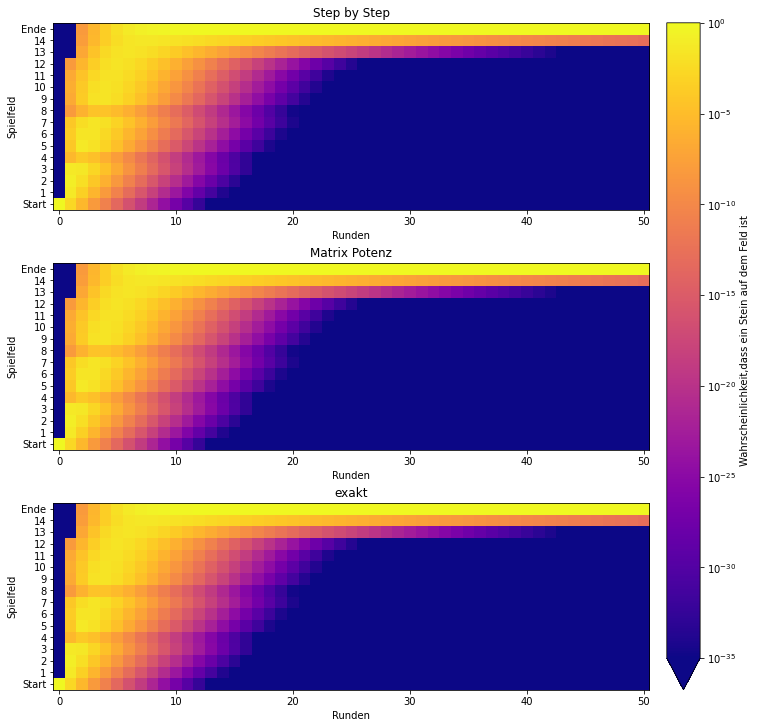

In [139]:
fig, ax = plt.subplots(3, 1, figsize=(25,10),layout="constrained")
for i, data in enumerate([datenreihe_sbs, datenreihe_mp, np.array(datenreihe_exakt).astype(np.float64).reshape((51, 16))]):
    data = np.array(data).T
    im0 = ax[i].imshow(data, origin="lower", cmap=plt.get_cmap(
        "plasma"), interpolation='none', norm=LogNorm(vmin=1e-35, vmax=1,clip=True))


fig.colorbar(im0, ax=ax, pad=.01, extend="min",label="Wahrscheinlichkeit,dass ein Stein auf dem Feld ist")

for i, name in enumerate(["Step by Step", "Matrix Potenz","exakt"]):
    ax[i].set_title(name)
    ax[i].set_yticks([0]+list(range(1, 15))+[15],
                     ["Start"]+list(range(1, 15))+["Ende"])
    ax[i].set_xlabel("Runden")
    ax[i].set_ylabel("Spielfeld")
    ax[i].set_ylim(-.5, 15.5)



Berechnung der Differenzen

In [166]:
datenreihe_diff_sbs = np.asarray([np.asarray(sy.Matrix(datenreihe_sbs[i]).T - datenreihe_exakt[i])[0]
                                 for i in range(len(datenreihe_exakt))], dtype=np.float64)
datenreihe_diff_mp = np.asarray([np.asarray(sy.Matrix(datenreihe_mp[i]).T - datenreihe_exakt[i])[0]
                                 for i in range(len(datenreihe_exakt))], dtype=np.float64)



Plotten wir nun die Differenzen ist deutlich zu sehen wie sich bereits in Runde 13 eine Ungenauigkeit einschleicht

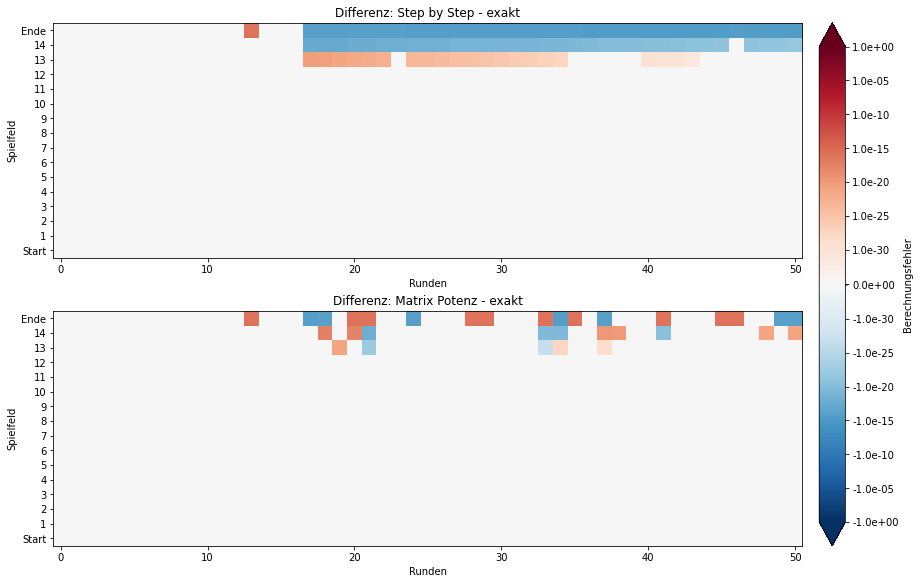

In [168]:
fig, ax = plt.subplots(2, 1, figsize=(25, 8), layout="constrained")


for i, data in enumerate([datenreihe_diff_sbs, datenreihe_diff_mp]):
    data = np.array(data).T
    im1 = ax[i].imshow(data, origin="lower", interpolation='none', cmap=plt.get_cmap(
        "RdBu_r"), norm=SymLogNorm(linthresh=1e-35, linscale=10e-2,
                                   vmin=-1.0, vmax=1.0, base=10))
                        

tick_locations = ([-(10**(-x*5)) for x in range(7)]
                  + [0.0]
                  + [(10**(-x*5)) for x in range(6,-1,-1)])
fig.colorbar(im1, ax=ax, pad=.01, extend="both",
             format="%.1e", label="Berechnungsfehler", ticks=tick_locations)

for i, name in enumerate(["Differenz: Step by Step - exakt", "Differenz: Matrix Potenz - exakt"]):
    ax[i].set_title(name)
    ax[i].set_yticks([0]+list(range(1, 15))+[15],
                     ["Start"]+list(range(1, 15))+["Ende"])
    ax[i].set_xlabel("Runden")
    ax[i].set_ylabel("Spielfeld")
    ax[i].set_ylim(-.5, 15.5)



In [169]:
runden = 500
d0 = datetime.now()
datenreihe_sbs = berechne_step_by_step(M_R, runden)
d1 = datetime.now()
datenreihe_mp = berechne_mit_Matrix_Potenz(M_R, runden)
d2 = datetime.now()
datenreihe_exakt = berechne_exakt_step_by_step(
    RundenMatrix_exakt(**VierfachMünzwurf_exakt), runden)
d3 = datetime.now()
datenreihe_exakt_mp = berechne_exakt_mit_Matrix_Potenz(
    RundenMatrix_exakt(**VierfachMünzwurf_exakt), runden)
d4 = datetime.now()

print("Rechenzeit step by step: ", d1-d0)
print("Rechenzeit Matrix Potenz: ", d2-d1)
print("Rechenzeit exakt: ", d3-d2)
print("Rechenzeit exakt Matrix Potenz: ", d4-d3)


Rechenzeit step by step:  0:00:00.001001
Rechenzeit Matrix Potenz:  0:00:00.015002
Rechenzeit exakt:  0:00:00.313071
Rechenzeit exakt Matrix Potenz:  0:00:32.466932


Die Erklärung für das Problem

In [172]:
np.finfo(float)


finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)